In [40]:
import pandas as pd
from uszipcode import SearchEngine
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [41]:
search = SearchEngine(simple_zipcode=False) # Gives a lot of interesting data if set to False
slalom_latitude = 33.854473
slalom_longitude = -84.360729

closest_zip_codes = search.by_coordinates(slalom_latitude, slalom_longitude, radius=10, returns=1000)
closest_zip_codes = list(map(lambda x: x.zipcode, closest_zip_codes))

print(len(closest_zip_codes))

41


In [42]:
search.by_zipcode(30312).to_dict()

{'zipcode_type': 'Standard',
 'major_city': 'Atlanta',
 'post_office_city': 'Atlanta, GA',
 'common_city_list': ['Atlanta'],
 'county': 'Fulton County',
 'state': 'GA',
 'lat': 33.74,
 'lng': -84.38,
 'timezone': 'Eastern',
 'radius_in_miles': 2.0,
 'area_code_list': ['470', '404', '678', '770'],
 'population': 19360,
 'population_density': 5774.0,
 'land_area_in_sqmi': 3.35,
 'water_area_in_sqmi': 0.0,
 'housing_units': 12007,
 'occupied_housing_units': 10031,
 'median_home_value': 189400,
 'median_household_income': 39105,
 'bounds_west': -84.408184,
 'bounds_east': -84.358197,
 'bounds_north': 33.771133,
 'bounds_south': 33.717052,
 'zipcode': '30312',
 'polygon': [[-84.371944, 33.764849],
  [-84.370447, 33.76484],
  [-84.369098, 33.764834],
  [-84.367791, 33.764828],
  [-84.367804, 33.763952],
  [-84.366809, 33.763951],
  [-84.366621, 33.76396],
  [-84.366418, 33.763952],
  [-84.366414, 33.76399],
  [-84.3664, 33.764026],
  [-84.366353, 33.764077],
  [-84.36415, 33.76538],
  [-84.3

In [105]:
df_closest_zips = pd.read_csv('closest_zips.csv', dtype={'zipcode': str})
df_closest_zips = df_closest_zips.set_index('zipcode').T
import ast
closest = df_closest_zips['30084'].values.tolist()[1]
ast.literal_eval(closest)

df_closest_zips

zipcode,60629,79936,11368,90650,90011,91331,11226,90201,11373,11220,...,22214,23250,98154,98158,98174,98929,20045,20260,25305,82715
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,29307,29308,29309,29310,29311,29312,29313,29314,29315,29316
closest_zips,"['60629', '60636', '60652', '60632', '60609', ...","['79936', '79935', '79925', '79915', '79908']","['11368', '11355', '11369', '11372', '11373', ...","['90650', '90670', '90701', '90703', '90706', ...","['90011', '90007', '90021', '90037', '90015', ...","['91331', '91340', '91402', '91345', '91342', ...","['11226', '11225', '11218', '11210', '11203', ...","['90201', '90270', '90040', '90255', '90058', ...","['11373', '11372', '11379', '11369', '11377', ...","['11220', '11232', '11219', '11209', '11228', ...",...,"['22214', '22211', '22209', '22204', '22201', ...","['23250', '23075', '23150', '23223']","['98104', '98154', '98164', '98174', '98101', ...","['98158', '98148', '98188', '98166', '98168', ...","['98104', '98154', '98164', '98174', '98101', ...",['98929'],"['20005', '20045', '20006', '20036', '20260', ...","['20260', '20004', '20001', '20005', '20045', ...","['25305', '25301', '25304', '25314', '25311', ...",['82715']


In [4]:
df_2018 = pd.read_csv('Data/2018-12.csv')

/Users/uynguyen/Projects/healthsee/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5,7,8,10,13,16,17,22,28,49,50,51,52,53,58,59,76,77,78,79,82,83,84,85,86,87,88,89,90,91,92,93,96,100,101,103,104,106,107,110,111,112,113,115,117,118,133,134,135,136,137,139,140,143,148,151,159,160,161,168,169,170,176,177,178,182,183,184,191,192,194,195,196,203,204,205,212,213,214,216,217,218,225,226,227,228,229,230,232,233,234,242,243,245,246,247,248,249,250,252,253,254,255,256,257,258,259,260,263,264,265,266,267,268,270,271,272,274,275,276,279,280,281,283,284,285,286,287,288,290,291,292,295,296,297,298,299,300,301,302,303,305,306,307,310,311,312,313,314,315,316,317,455,456,457,458,459,460,461,462,463,464,465,466,467) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
df_2018.head()

df_2018['PHYSN_CNT'].sum()

151938.81999999998

In [35]:
# Clean up zip codes
df_2018['ZIP_CD'] = df_2018['ZIP_CD'].astype(str).replace('\.0', '', regex=True)

closest = df_2018[df_2018['ZIP_CD'].isin(closest_zip_codes)]
'''
Want Active Providers PGM_TRMNTN_CD == '0'
'''
blah = closest[['FAC_NAME', 'PRVDR_CTGRY_CD','PGM_TRMNTN_CD', 'TRMNTN_EXPRTN_DT', 'CRTFD_BED_CNT', 'ORGNL_PRTCPTN_DT', 'BED_CNT']]



blah = blah[closest['TRMNTN_EXPRTN_DT'].notnull()]

closures = blah

closures['BED_CNT'].sum()


7656.0

number of zipcodes within 10 miles of Slalom:  41
number of unique facilities within these zipcodes:  415

# of Facilities by city
ATLANTA : 292
DECATUR : 49
TUCKER : 28
MARIETTA : 26
SMYRNA : 16
SANDY SPRINGS : 5
DUNWOODY : 3
CHAMBLEE : 2
DORAVILLE : 2
EAST POINT : 1
SCOTTDALE : 1
COLLEGE PARK : 1
STONE MOUNTAIN : 1
BELVEDERE : 1
ATL : 1
CLARKSTON : 1

Provider status counts:
ACTIVE PROVIDER : 216
VOLUNTARY-MERGER, CLOSURE : 139
VOLUNTARY-OTHER REASON FOR WITHDRAWAL : 41
OTHER-PROVIDER STATUS CHANGE : 33
INVOLUNTARY-FAILURE TO MEET HEALTH/SAFETY REQ : 1

TOP 10 Largest Facilities by Bed Count
GRADY MEMORIAL HOSPITAL 953.0
WELLSTAR ATLANTA MEDICAL CENTER 762.0
EMORY UNIVERSITY HOSPITAL MIDTOWN 481.0
PIEDMONT HOSPITAL 458.0
ATLANTA VA MEDICAL CENTER 456.0
EMORY DECATUR HOSPITAL 451.0
NORTHSIDE HOSPITAL 444.0
SAINT JOSEPH'S HOSPITAL OF ATLANTA, INC 410.0
BROOK RUN 365.0
WEST PACES FERRY HOSPITAL 294.0


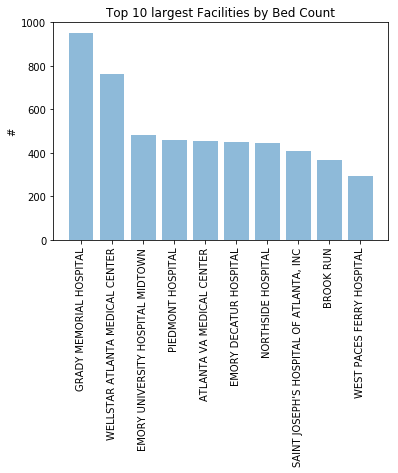


# of times facility undergone change of ownership
0 : 318
1 : 54
2 : 40
3 : 8
4 : 6
7 : 2
8 : 1
6 : 1

Urban or Rural
U : 429
R : 1


/Users/uynguyen/Projects/healthsee/venv/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/uynguyen/Projects/healthsee/venv/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


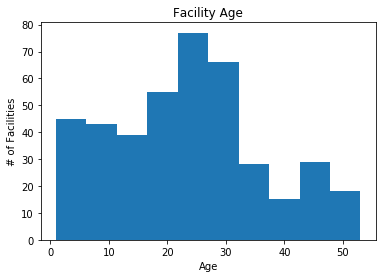

In [7]:
print('number of zipcodes within 10 miles of Slalom: ' ,len(closest_zip_codes))
#print(closest[closest.duplicated(subset = ['FAC_NAME'])]['FAC_NAME'])
print('number of unique facilities within these zipcodes: ', len(closest['FAC_NAME'].unique()))
provider_status_counts_dict = closest['PGM_TRMNTN_CD'].value_counts().to_dict()
PGM_TRMNTN_CD_DICT = {
    0: 'ACTIVE PROVIDER',
    1: 'VOLUNTARY-MERGER, CLOSURE',
    4: 'VOLUNTARY-OTHER REASON FOR WITHDRAWAL',
    5: 'INVOLUNTARY-FAILURE TO MEET HEALTH/SAFETY REQ',
    7: 'OTHER-PROVIDER STATUS CHANGE'
}

print('\n# of Facilities by city')
fac_by_city_dict = closest['CITY_NAME'].value_counts().to_dict()
[print(k,':', v) for k,v in fac_by_city_dict.items()]

print('\nProvider status counts:')
[print(PGM_TRMNTN_CD_DICT[k],":", v) for k,v  in provider_status_counts_dict.items()]

bed_cnt_dict = {}
print('\nTOP 10 Largest Facilities by Bed Count')
for index, row in closest[['FAC_NAME','BED_CNT']].sort_values(by='BED_CNT', ascending=False)[:10].iterrows():
    print(row['FAC_NAME'], row['BED_CNT'])
    bed_cnt_dict[row['FAC_NAME']] = row['BED_CNT']

y_pos = np.arange(10)
plt.bar(y_pos, bed_cnt_dict.values(), align='center', alpha=0.5)
plt.xticks(y_pos, bed_cnt_dict.keys())
plt.xticks(rotation=90)
plt.ylabel('#')
plt.title('Top 10 largest Facilities by Bed Count')
plt.show()

print('\n# of times facility undergone change of ownership')
chow_cnt_dict = closest['CHOW_CNT'].value_counts().to_dict()
[print(k,':', v) for k,v in chow_cnt_dict.items()]

print('\nUrban or Rural')
ur_dict = closest['CBSA_URBN_RRL_IND'].value_counts().to_dict()
[print(k,':', v) for k,v in ur_dict.items()]

closest['ORGNL_PRTCPTN_DT'] = pd.to_datetime(closest['ORGNL_PRTCPTN_DT'], format='%Y%M%d')
closest['Age_of_facility'] = datetime.today().year - closest['ORGNL_PRTCPTN_DT'].dt.year
closest[['FAC_NAME', 'Age_of_facility']].sort_values(by='Age_of_facility', ascending=False)
facility_age_dict = dict(zip(closest.FAC_NAME, closest.Age_of_facility))

plt.hist(facility_age_dict.values(), 10)
plt.ylabel('# of Facilities')
plt.xlabel('Age')
plt.title('Facility Age')
plt.show()
   
    
    
    
    
    